In [1]:
#IMAGE PROCESSING 

In [42]:
import numpy as np
import matplotlib.pyplot as pt
from PIL import Image,ImageOps,ImageFilter

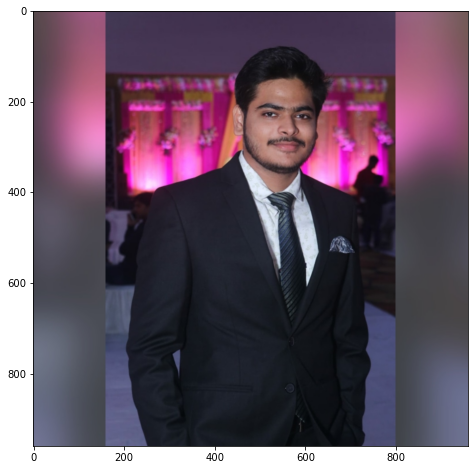

In [3]:
img = np.array(Image.open("C:\\Users\\nk4au\\OneDrive\\Desktop\\Nikhil.jpg"))
pt.figure(figsize=(8,8))
pt.imshow(img)
pt.show()

In [4]:
print('# of dims: ',img.ndim)     # dimension of an image
print('Img shape: ',img.shape)    # shape of an image
print('Dtype: ',img.dtype)
print(img[20, 20])                # pixel value at [R, G, B]
print(img[:, :, 2].min())         # min pixel value at channel B

# of dims:  3
Img shape:  (960, 960, 3)
Dtype:  uint8
[93 74 80]
8


In [5]:
#Saving an image

In [6]:
simg='Nikhil1.jpg'
img1=Image.fromarray(img)
img1.save(simg)

In [8]:
#function to rotate image by 90 degree
def rotates(img):
    img3=img.copy()
    '''pt.imshow(img3) 
    pt.show()'''
    #imgg=img.sum(2)/(255*3)  #image converted to grayscale as it is helpful for processing of segmentation
    fig = pt.figure(figsize=(10, 10))
    fig.add_subplot(1, 2, 1)
    pt.imshow(img)
    pt.title('The Original Image')
    degree=90
    for _ in range(degree//2):
        img3=img3.transpose(1,0,2)
        for j in range(0, img3.shape[1] // 2):
            c = img3[:, j, :].copy()
            img3[:, j, :] = img3[: , img3.shape[1]-j-1, :]
            img3[: , img3.shape[1]-j-1, :] = c
    fig.add_subplot(1, 2, 2)
    pt.imshow(img3)
    pt.title("rotated")

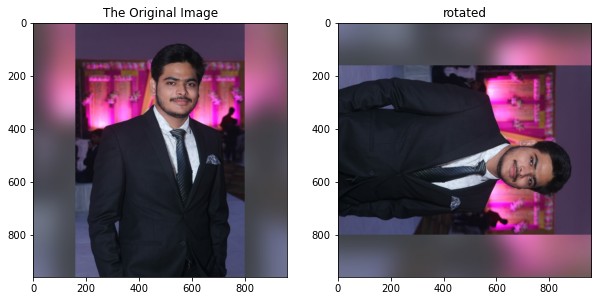

In [21]:
rotates(img)

In [11]:
#Function for gray scale
def convert_grey_scale(img):
    imgg=img.sum(2)/(255*3)
    pt.imshow(imgg)
    pt.show()
    return imgg

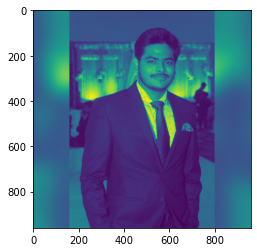

In [12]:
img01=convert_grey_scale(img)

In [13]:
#Function for converting imsge to negative image
# To convert:255-R,255-G,255-B
def convert_to_negative(img,img01):
    fig = pt.figure(figsize=(10, 10))
    img01= 255*3 -img01     
    fig.add_subplot(1, 2, 1)
    pt.imshow(img01)
    pt.title('Negative of Grey image')
    img = 255 - img
    fig.add_subplot(1, 2, 2)
    pt.imshow(img)
    pt.title('Negative of RGB image')

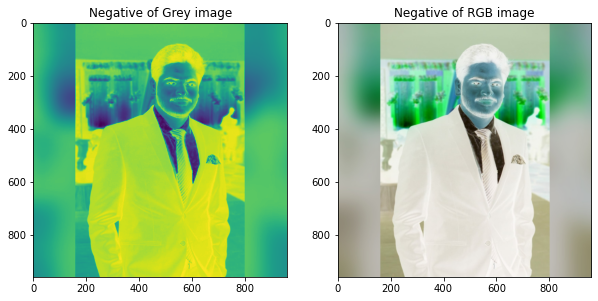

In [14]:
convert_to_negative(img,img01)

In [32]:
def RGB_convert(img):
    img1=np.array(img)
    img_Red=img1.copy()
    img_Green=img1.copy()
    img_Blue=img1.copy()
    img_Red[:, :, (1, 2)] = 0
    img_Green[:, :, (0, 2)] = 0
    img_Blue[:, :, (0, 1)] = 0
    img_rgb = np.concatenate((img_Red,img_Green,img_Blue), axis=1)
    pt.figure(figsize=(15, 15))
    pt.imshow(img_rgb)

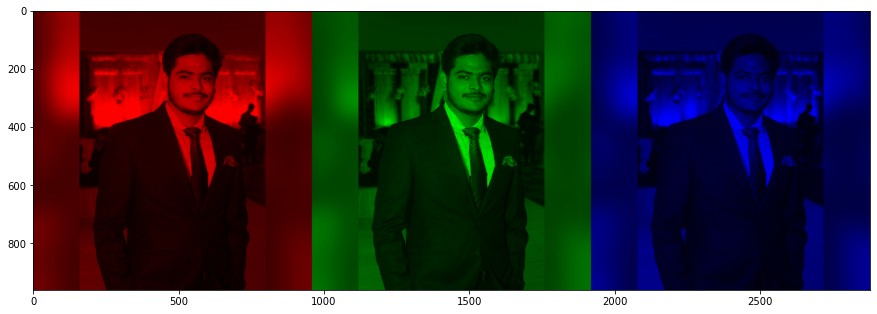

In [33]:
RGB_convert(img)

In [34]:
#Triming of image is done with the help of Slicing
def trim_image(img,k):
    img1=img.copy()
    fig = pt.figure(figsize=(10, 10))
    fig.add_subplot(1, 2, 1)
    pt.imshow(img1)
    pt.title('Original')
    img_trim= img[k:-k, k:-k, :]   #Slicing
    fig.add_subplot(1, 2, 2)
    pt.imshow(img_trim)
    pt.title('Trimmed')

In [35]:
k=int(input())

300


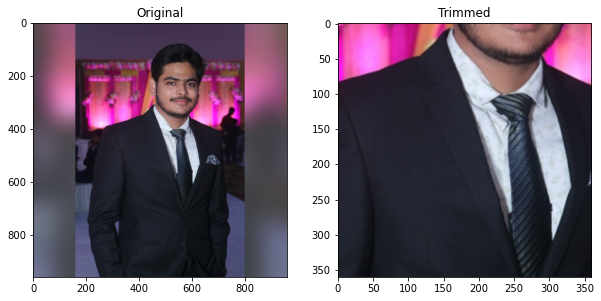

In [36]:
trim_image(img,k)

In [37]:
def color_reduction(img):
    img1=img.copy()
    img2 = (img // 64) * 64
    img3 = (img // 128) * 128
    imgg = np.concatenate((img1, img2, img3), axis=1)
    pt.figure(figsize=(15, 15))
    pt.imshow(imgg)

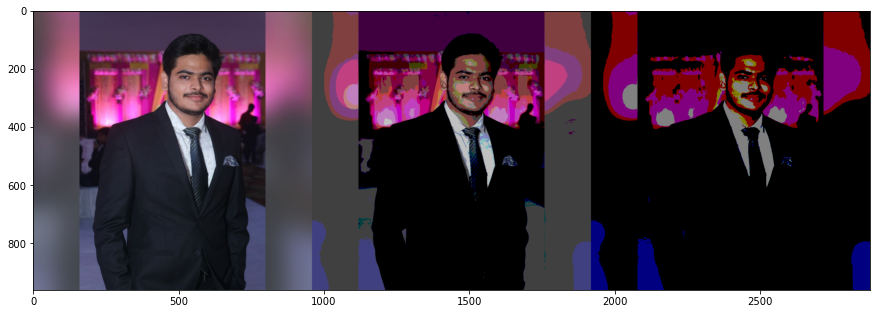

In [38]:
color_reduction(img)

In [39]:
def flipping_image(img):
    img1=img.copy()
    fig = pt.figure(figsize=(10, 10))
    fig.add_subplot(1, 2, 1)
    pt.imshow(np.flipud(img1))
    fig.add_subplot(1, 2, 2)
    pt.imshow(np.fliplr(img1))
# np.flipud() : [up/down]flips over x-axis
# np.fliplr() : [left/right]flips over y_axis

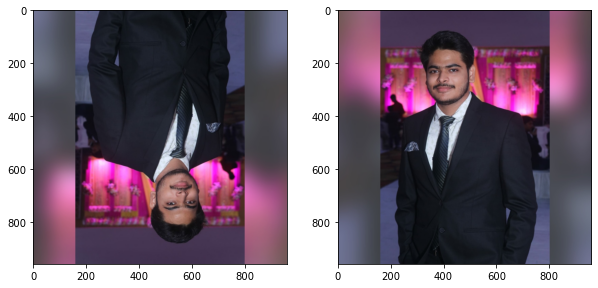

In [40]:
flipping_image(img)

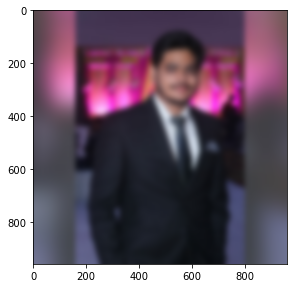

In [43]:
im = Image.open(r"C:\Users\nk4au\OneDrive\Desktop\Nikhil.jpg")
# Blurring the image
im1 = im.filter(ImageFilter.GaussianBlur(10))
# Shows the image in image viewer
fig = pt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 2)
pt.imshow(im1)